In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

In [3]:
df = pd.read_csv('concrete_data.csv')

In [4]:
df.sample(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
395,200.0,200.0,0.0,190.0,0.0,1145.0,660.0,28,49.25
488,387.0,20.0,94.0,157.0,14.3,938.0,845.0,3,22.75
460,178.0,129.8,118.6,179.9,3.6,1007.3,746.8,100,49.99
937,313.3,0.0,113.0,178.5,8.0,1001.9,688.7,28,36.80


In [5]:
df.shape

(1030, 9)

In [6]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [7]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
x_train,x_test,y_train,y_test = train_test_split(df.drop('Strength',axis = 1),
                                                df['Strength'] , random_state = 2,
                                                test_size = 0.2 )

In [8]:
x_train

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
128,401.8,94.7,0.0,147.4,11.4,946.8,852.1,28
365,214.9,53.8,121.9,155.6,9.6,1014.3,780.6,14
480,446.0,24.0,79.0,162.0,11.6,967.0,712.0,7
814,310.0,0.0,0.0,192.0,0.0,970.0,850.0,360
169,425.0,106.3,0.0,153.5,16.5,852.1,887.1,91
...,...,...,...,...,...,...,...,...
360,218.2,54.6,123.8,140.8,11.9,1075.7,792.7,14
466,190.3,0.0,125.2,166.6,9.9,1079.0,798.9,100
299,290.4,0.0,96.2,168.1,9.4,961.2,865.0,3
493,387.0,20.0,94.0,157.0,11.6,938.0,845.0,7


In [9]:
# Applying algorithm without any transformation
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [10]:
r2_score(y_test,y_pred)

0.570114265275778

In [11]:
# cross-validation 
lr = LinearRegression()
x = df.drop(columns = ['Strength'])
y = df.iloc[:,-1]

In [12]:
np.mean(cross_val_score(lr,x,y,scoring = 'r2'))

0.4609940491662865

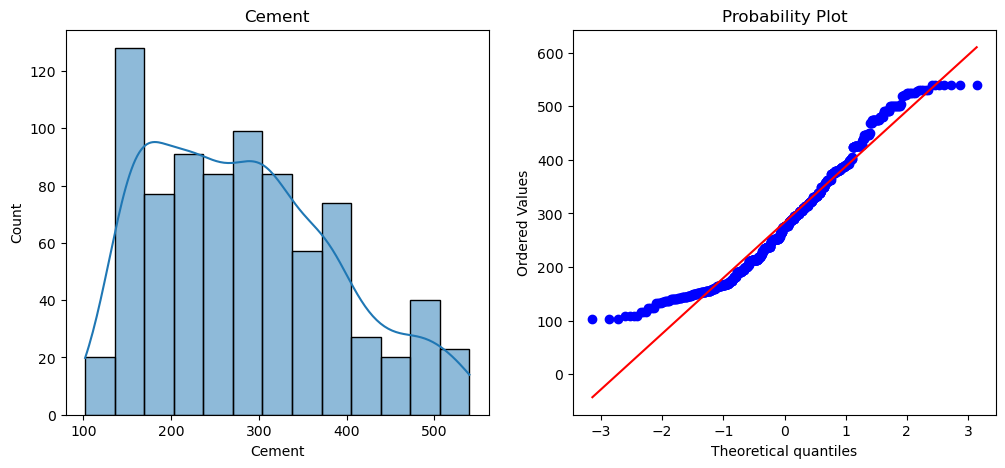

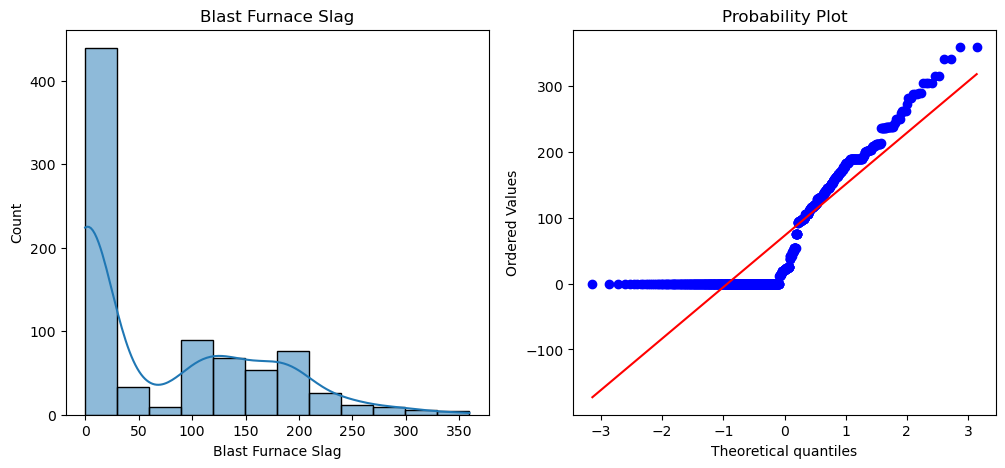

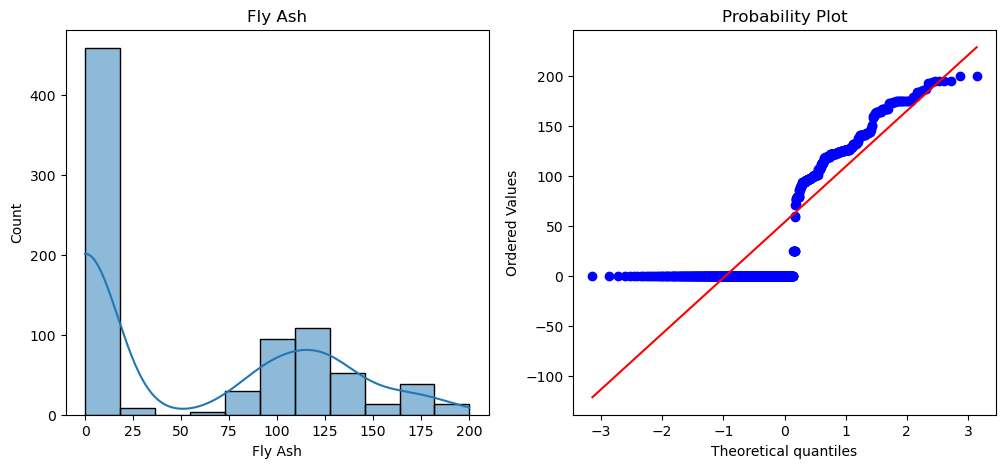

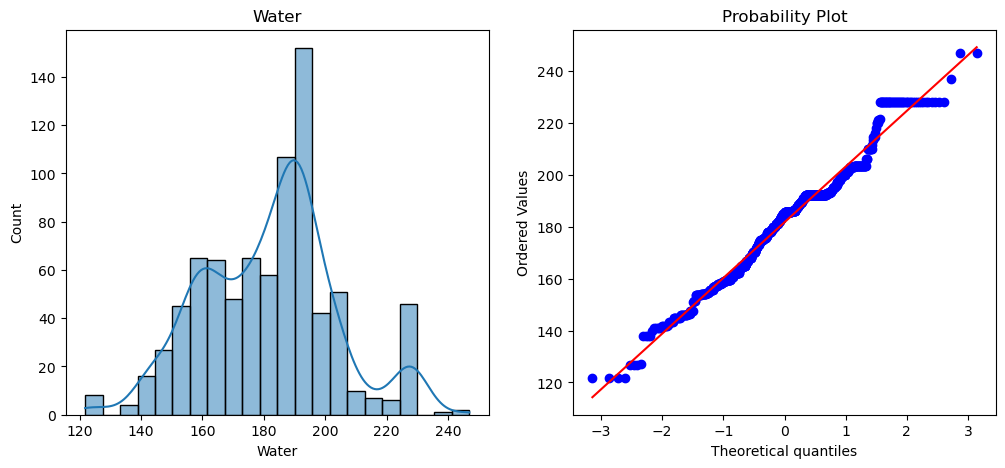

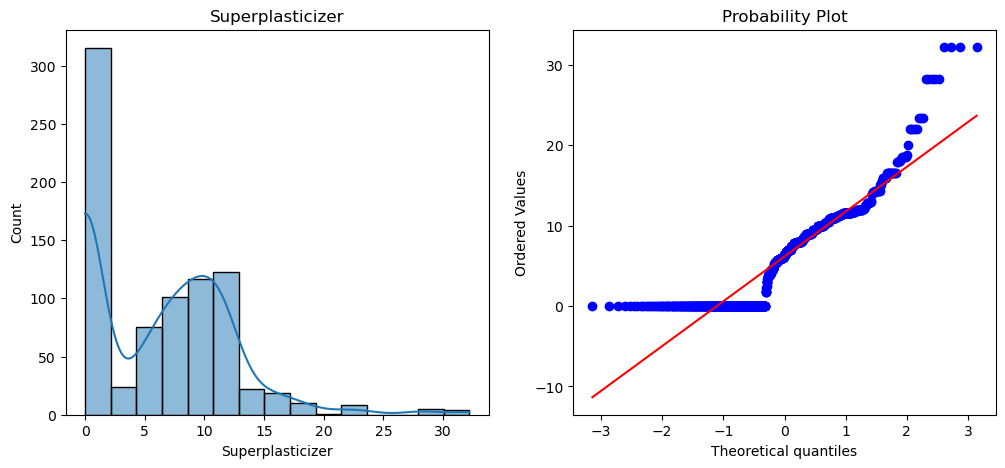

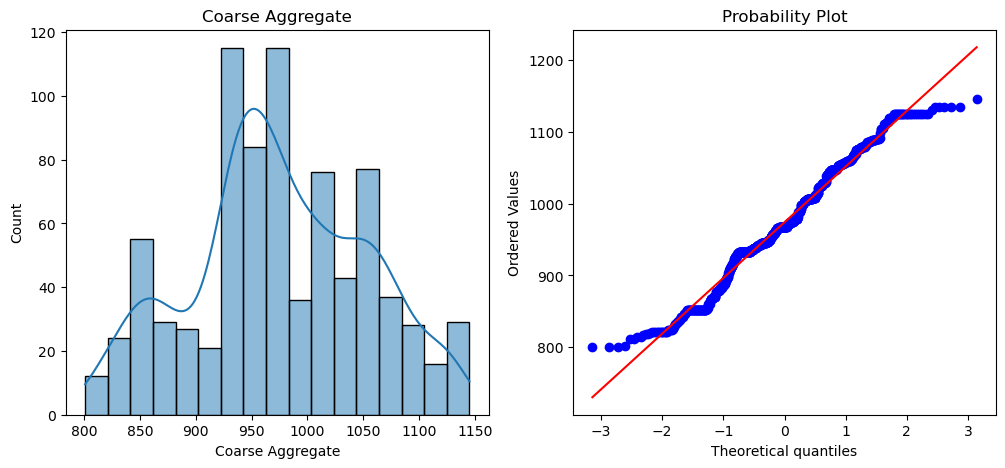

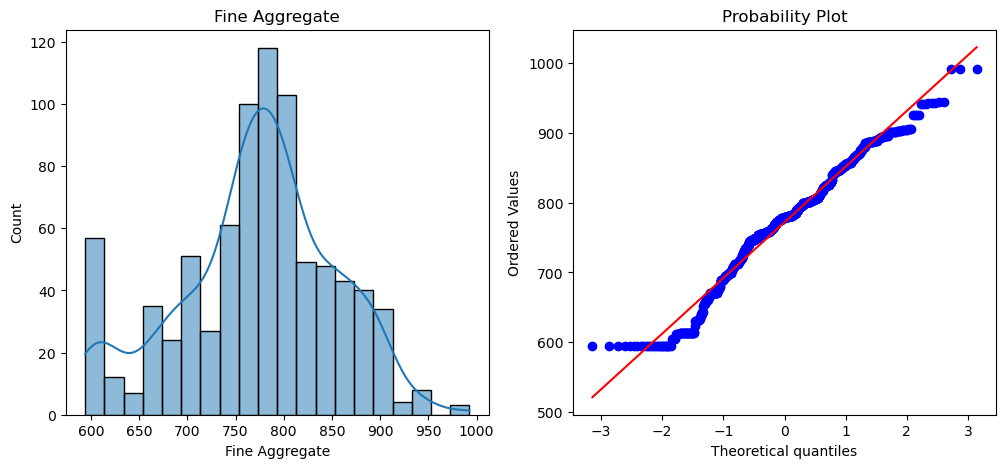

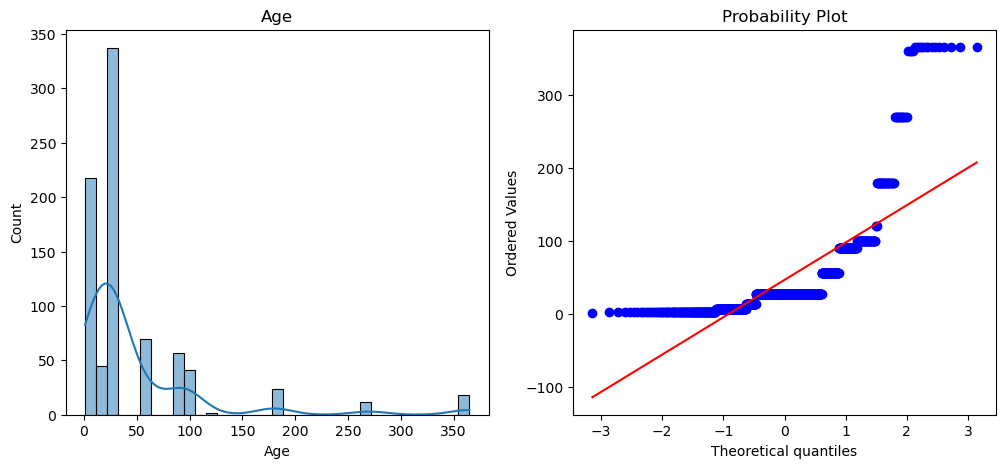

In [13]:
# let's check the transform with the help of ploting 
for col in x_train.columns:
    plt.figure(figsize=(12,5))
    
    plt.subplot(121)
    sns.histplot(x_train[col],kde = True)
    plt.title(col)
    
    plt.subplot(122)
    stats.probplot(x_train[col],dist='norm',plot = plt)
    
    plt.show()

In [14]:
# apply Box-Cox transform

pt  = PowerTransformer(method = 'box-cox')
x_train_transformed = pt.fit_transform(x_train+0.000001)
x_test_transformed = pt.transform(x_test+0.000001)

pd.DataFrame({'cols':x_train.columns,'box_cox_lambdas':pt.lambdas_})

,cols,box_cox_lambdas
0,Cement,0.180594
1,Blast Furnace Slag,0.019741
2,Fly Ash,-0.037322
3,Water,0.746716
4,Superplasticizer,0.092142
5,Coarse Aggregate,1.012482
6,Fine Aggregate,1.992195
7,Age,0.028289


In [15]:
# let's apply Linear Regression on transformed data 

lr = LinearRegression()
lr.fit(x_train_transformed,y_train)
y_pred2 = lr.predict(x_test_transformed)
r2_score(y_test,y_pred2)

0.7784639746716954

In [17]:
# using cross val score
pt = PowerTransformer(method = 'box-cox')
x_transformed = pt.fit_transform(x+0.000001)

lr = LinearRegression()
np.mean(cross_val_score(lr,x_transformed,y,scoring = 'r2'))

0.6662950327869244

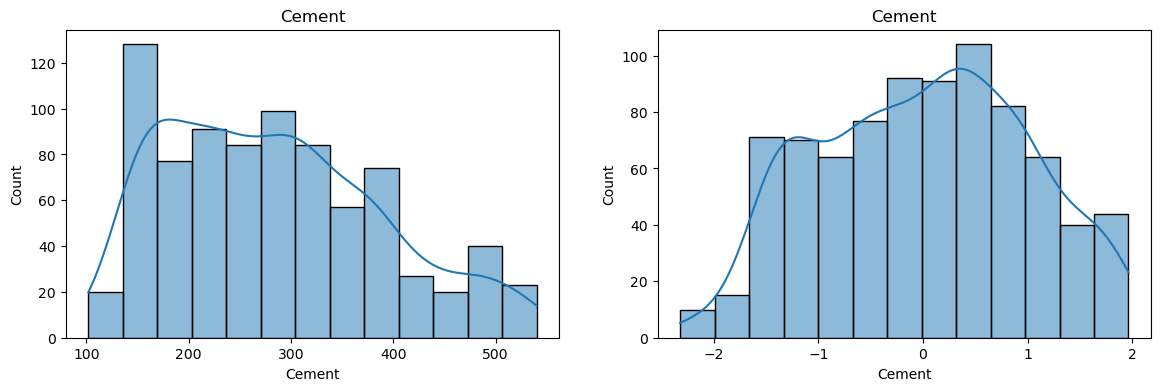

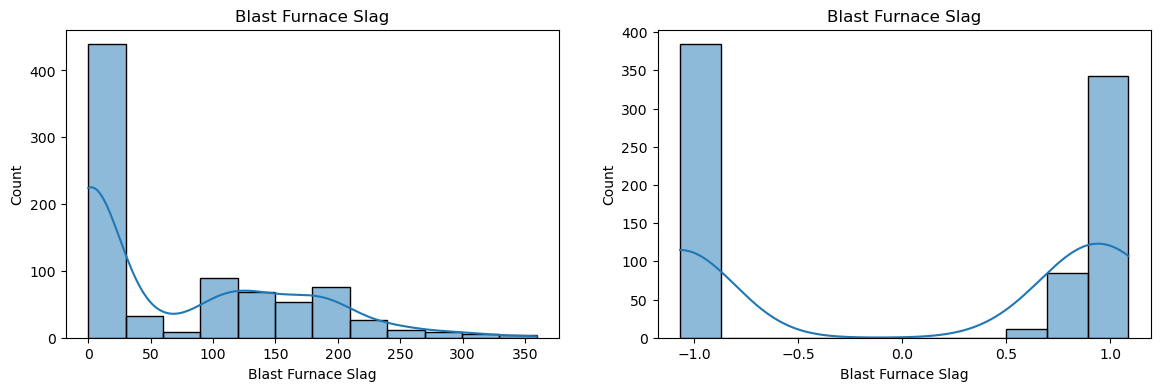

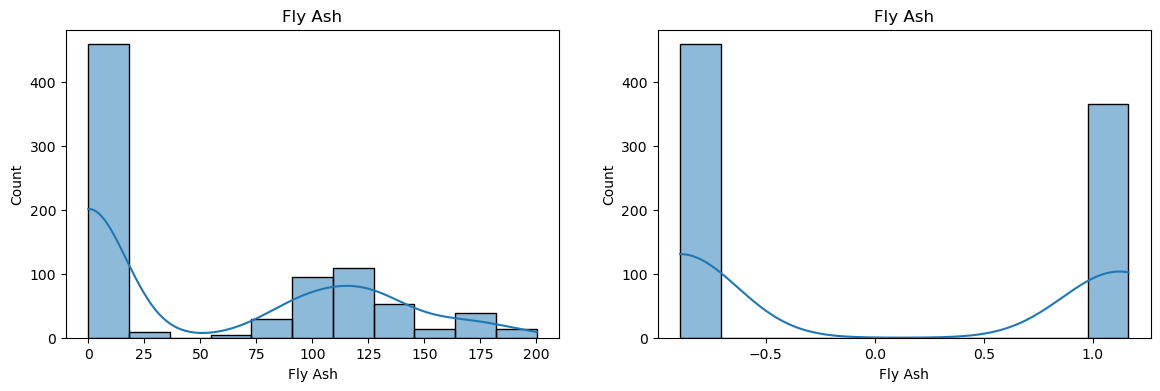

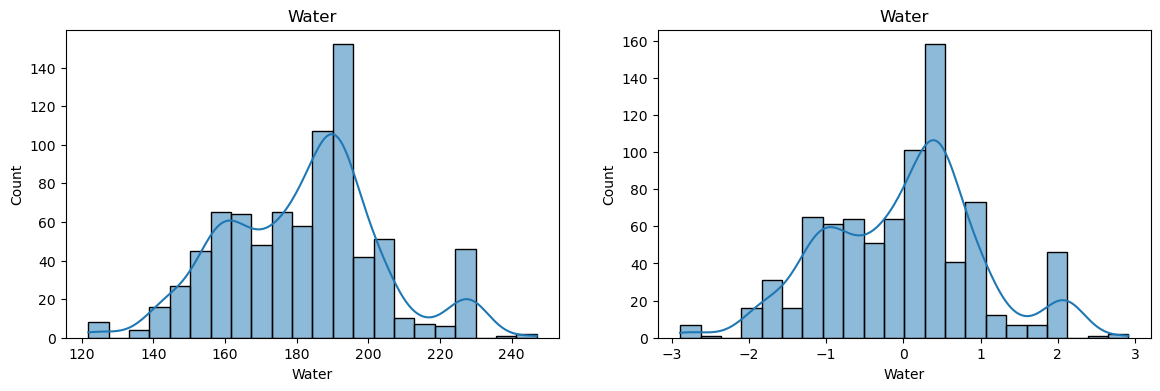

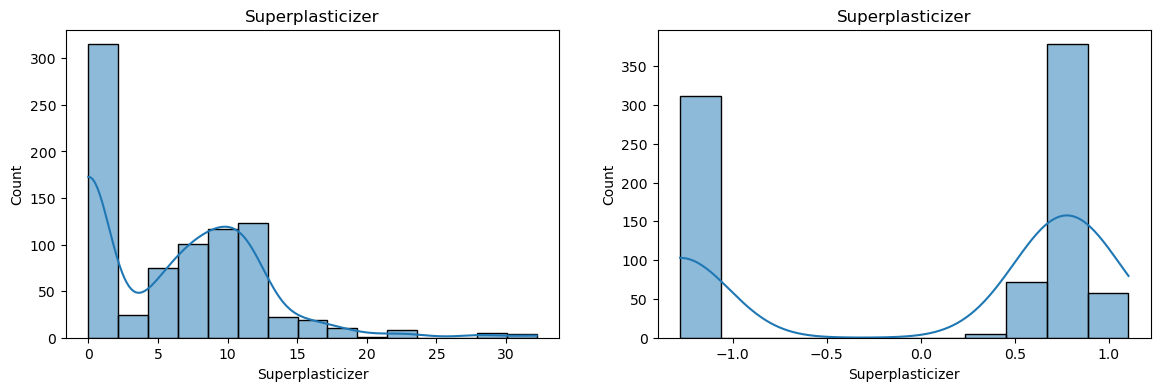

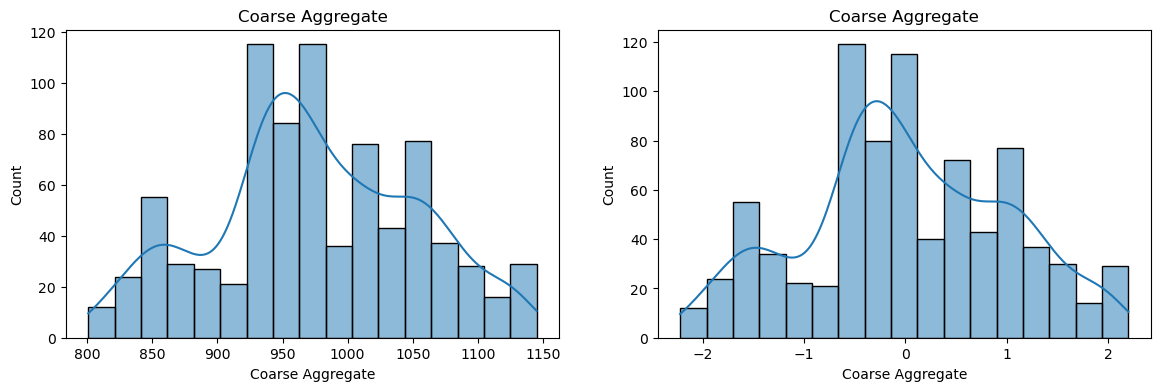

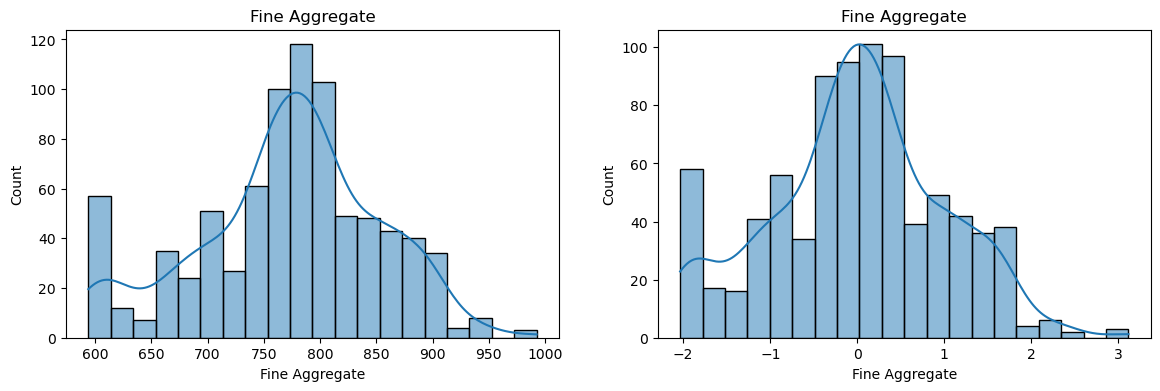

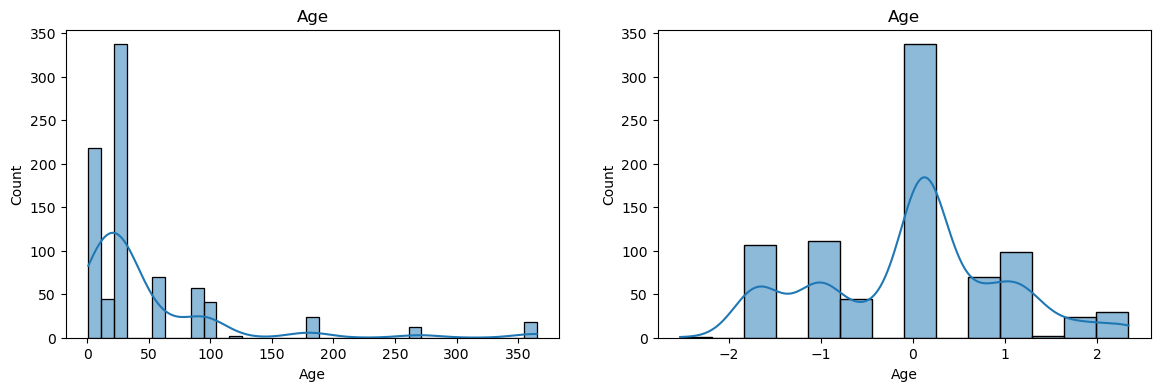

In [23]:
# Before and after comparision for box-cox Plot
x_train_transformed = pd.DataFrame(x_train_transformed,columns = x_train.columns)

for col in x_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(x_train[col],kde = True)
    plt.title(col)
    
    plt.subplot(122)
    sns.histplot(x_train_transformed[col],kde = True)
    plt.title(col)
    
    plt.show()

In [20]:
# Apply Yeo-Johnson transformer 
pt1 = PowerTransformer()

x_train_transformed2 = pt1.fit_transform(x_train)
x_test_transformed2 = pt1.fit_transform(x_test)

lr = LinearRegression()
lr.fit(x_train_transformed2,y_train)

y_pred3 = lr.predict(x_test_transformed2)

print(r2_score(y_test,y_pred))

0.570114265275778


In [23]:
pd.DataFrame({'cols':x_train.columns,'Yeo-Johnson':pt1.lambdas_})

,cols,Yeo-Johnson
0,Cement,0.157493
1,Blast Furnace Slag,0.086352
2,Fly Ash,-0.070498
3,Water,1.094111
4,Superplasticizer,0.320142
5,Coarse Aggregate,1.668510
6,Fine Aggregate,1.169052
7,Age,0.110458


In [30]:
# applying cross-val score

pt = PowerTransformer()
x_transformed2 = pt.fit_transform(x)

lr = LinearRegression()
np.mean(cross_val_score(lr,x_transformed2,y,scoring='r2'))

0.6834625134285743

In [51]:
x_train_transformed2 = pd.DataFrame(x_train_transformed,columns = x_train.columns)

In [52]:
x_train_transformed2

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,1.107327,0.849499,-0.889698,-1.612670,0.940931,-0.349962,1.006944,0.120827
1,-0.564337,0.618813,1.137770,-1.215420,0.764207,0.517244,0.056250,-0.467103
2,1.404939,0.293889,1.011397,-0.909047,0.959349,-0.090522,-0.778193,-1.034636
3,0.391434,-1.041164,-0.889698,0.488655,-1.209173,-0.051985,0.977844,2.302661
4,1.266710,0.896824,-0.889698,-1.316639,1.354156,-1.565296,1.502438,1.132795
...,...,...,...,...,...,...,...,...
819,-0.525837,0.624811,1.142133,-1.936481,0.986570,1.306712,0.211327,-0.467103
820,-0.867680,-1.041164,1.145300,-0.690734,0.795152,1.349160,0.291706,1.213636
821,0.216388,-1.041164,1.069751,-0.619877,0.743210,-0.165021,1.187266,-1.668374
822,1.001664,0.221673,1.062982,-1.148133,0.959349,-0.462964,0.908845,-1.034636


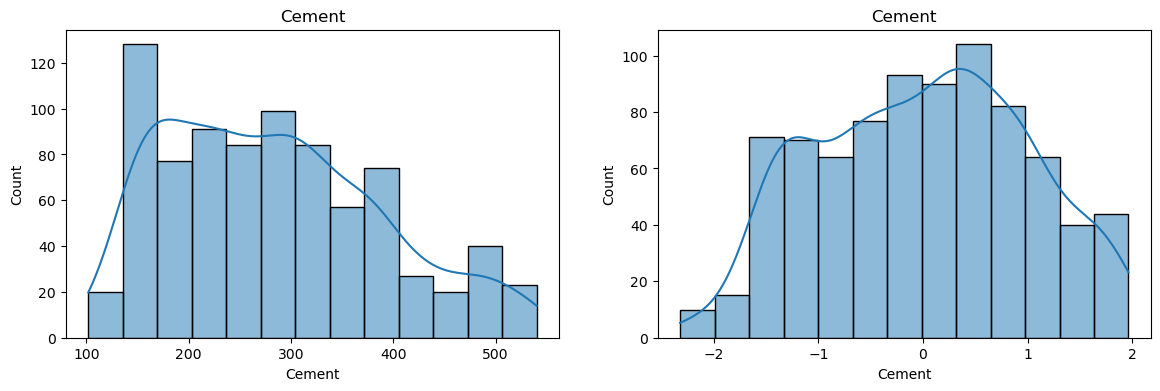

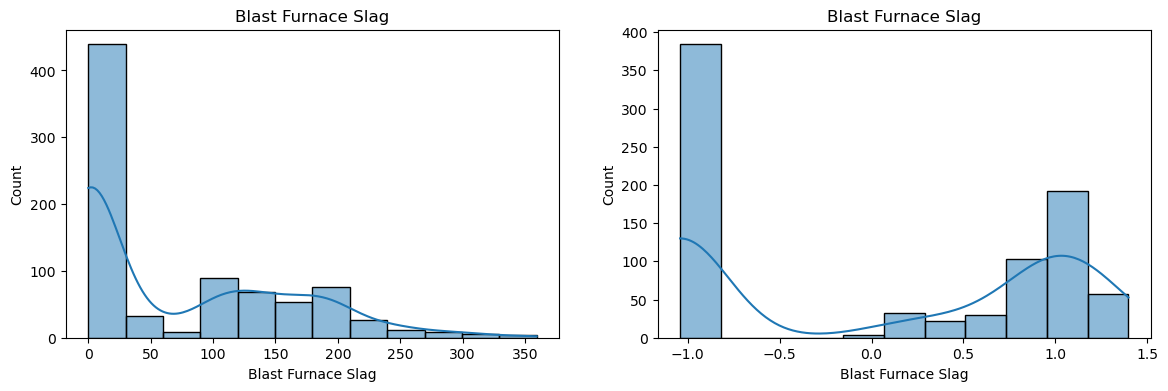

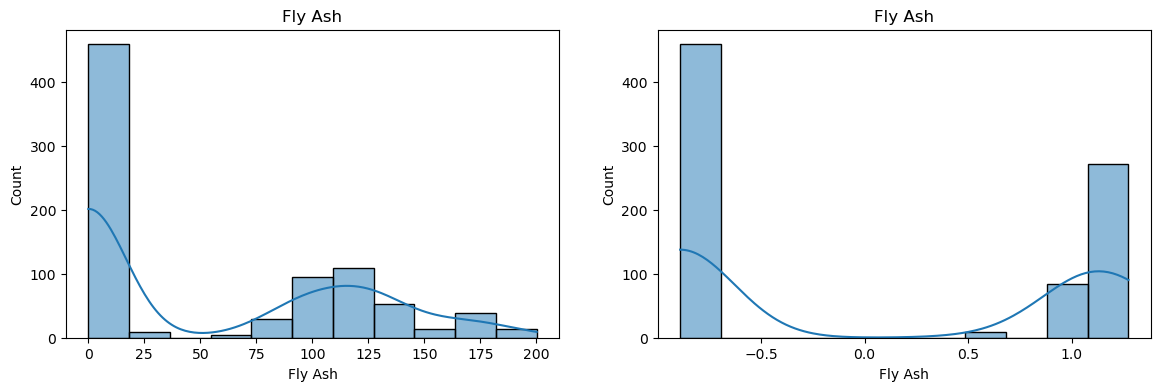

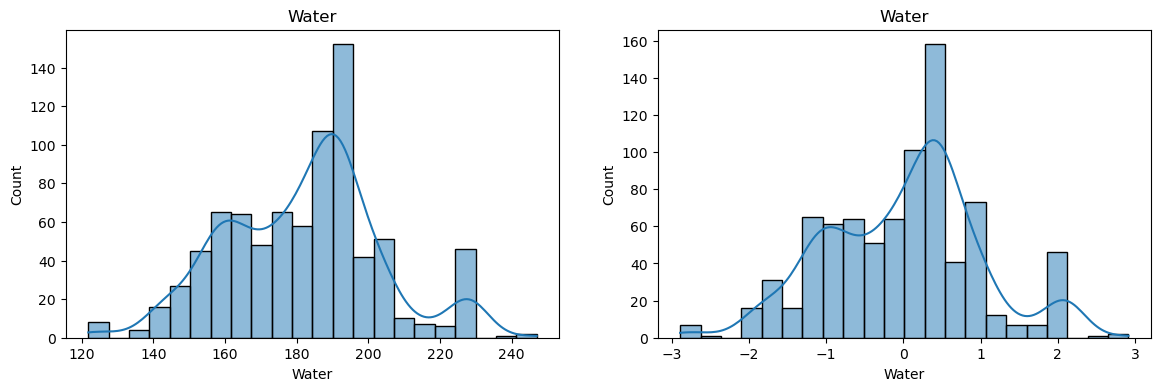

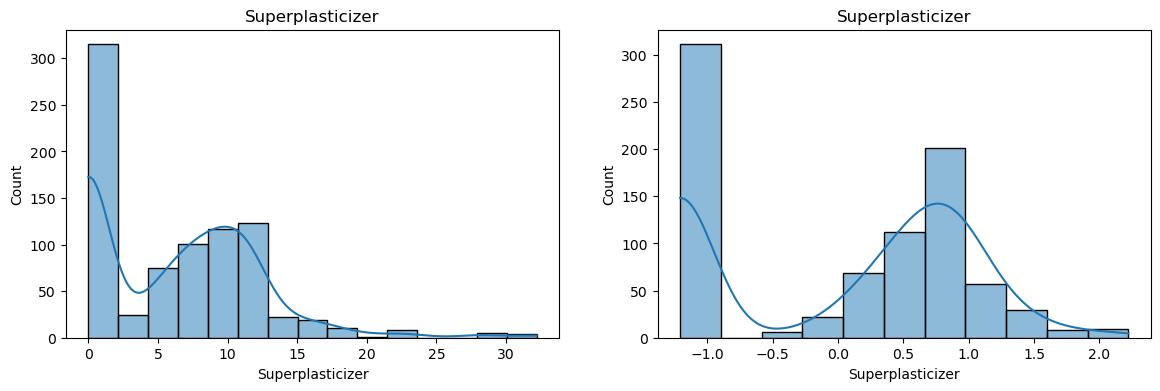

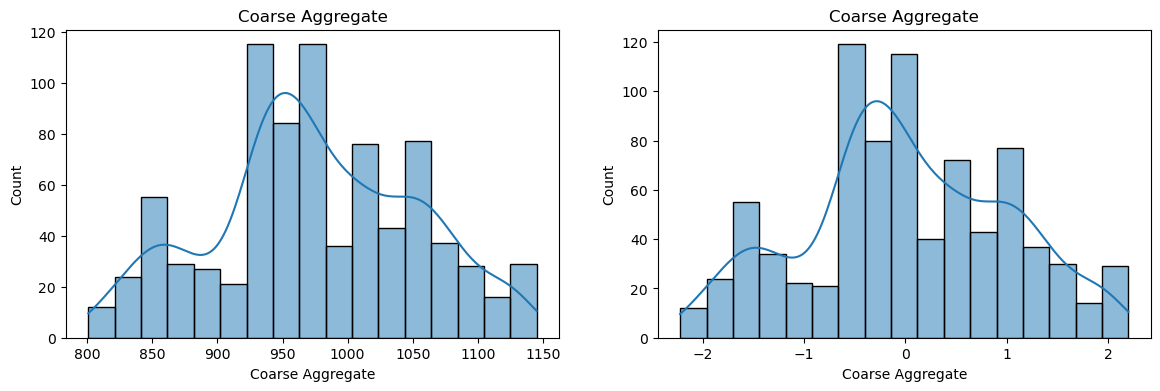

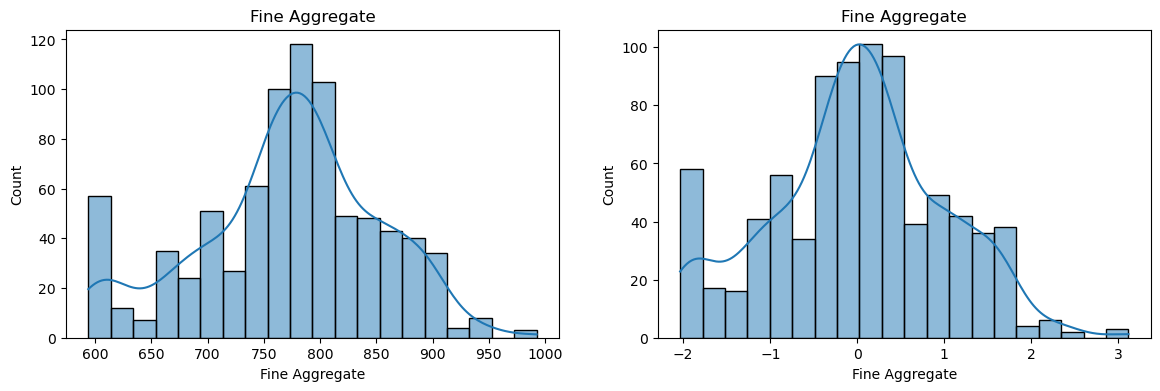

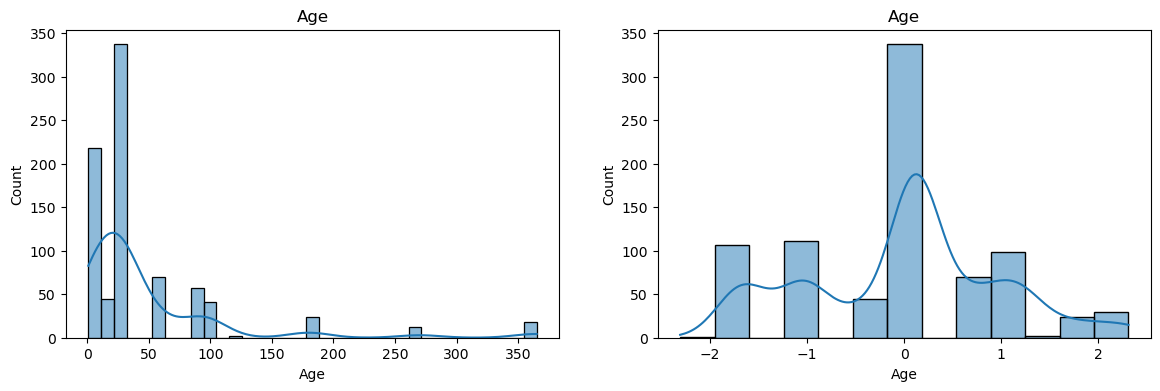

In [54]:
# for col in x_trian_transformed2.columns :
#     plt.figure(figsize = (14,4))

#     plt.subplot(121)
#     sns.histplot(x_train[col],kde = True)
#     plt.title(col)
    
#     plt.subplot(122)
#     sns.distplot(x_train_transformed2[col])
#     plt.title(col)
    
#     plt.show()


for col in x_train_transformed2.columns :
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(x_train[col],kde =True)
    plt.title(col)

    plt.subplot(122)
    sns.histplot(x_train_transformed2[col],kde = True)
    plt.title(col)

In [55]:
pd.DataFrame({'cols':x_train.columns,'box-cox_lambdas':pt.lambdas_,'yeo-johnson_lambdas':pt1.lambdas_})

,cols,box-cox_lambdas,yeo-johnson_lambdas
0,Cement,0.169544,0.157493
1,Blast Furnace Slag,0.016633,0.086352
2,Fly Ash,-0.136480,-0.070498
3,Water,0.808438,1.094111
4,Superplasticizer,0.264160,0.320142
5,Coarse Aggregate,1.129395,1.668510
6,Fine Aggregate,1.830763,1.169052
7,Age,0.001771,0.110458
